In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader
from einops import rearrange
# from neuralop.models import FNO
from tqdm import tqdm

from the_well.benchmark.metrics import VRMSE
from the_well.data import WellDataset
from the_well.utils.download import well_download


### Notes:
- I could not find a way to download only a subset of the dataset, though you might be able to do this [with huggingface](https://huggingface.co/docs/datasets/loading#slice-splits)

In [3]:
# device = "cuda"
base_path = "./datasets"  # path/to/storage

In [4]:
# Download the active_matter train dataset from Hugging Face Hub
# The following line may take a couple of minutes to instantiate the datamodule
trainset = WellDataset(
    well_base_path="hf://datasets/polymathic-ai/",  # access from HF hub
    well_dataset_name="active_matter",
    well_split_name="train",
)

/Users/echalstrey/projects/well-active_matter/thewellenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
trainset

<WellDataset: hf://datasets/polymathic-ai/active_matter/data/train>

In [6]:
len(trainset)

14000

In [7]:
item = trainset[0]
type(item)

dict

In [8]:
list(item.keys())

['input_fields',
 'output_fields',
 'constant_scalars',
 'boundary_conditions',
 'space_grid',
 'input_time_grid',
 'output_time_grid']

The most important elements are `input_fields` and `output_fields`.

They represent the time-varying physical fields of the dynamical system and are generally the input and target of our models.

In [9]:
item["input_fields"].shape

torch.Size([1, 256, 256, 11])

In [10]:
item["output_fields"].shape

torch.Size([1, 256, 256, 11])

In [11]:
# A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.
type(item["output_fields"])

torch.Tensor

In [12]:
# Get the tensor data type
item["output_fields"].dtype

torch.float32

In [13]:
trainset.metadata.field_names

{0: ['concentration'],
 1: ['velocity_x', 'velocity_y'],
 2: ['D_xx', 'D_xy', 'D_yx', 'D_yy', 'E_xx', 'E_xy', 'E_yx', 'E_yy']}

In an item, the input and output form a time-contiguous window in the trajectories.

In [ ]:
# Get the conencentration field
concentration_in = item["input_fields"][0]
concentration_out = item["output_fields"][0]

In [20]:
concentration_in.shape

torch.Size([256, 256, 11])

In [21]:
concentration_out.shape

torch.Size([256, 256, 11])

I think there are there 11 fields in the trainset and getting the first element of the 3rd axis of the tensor fives us the concentration field.

In [ ]:
# Get the 256x256x1 concentration fields as a numpy arrays
conc_in = concentration_in[:, :, 0].numpy()
conc_out = concentration_out[:, :, 0].numpy()

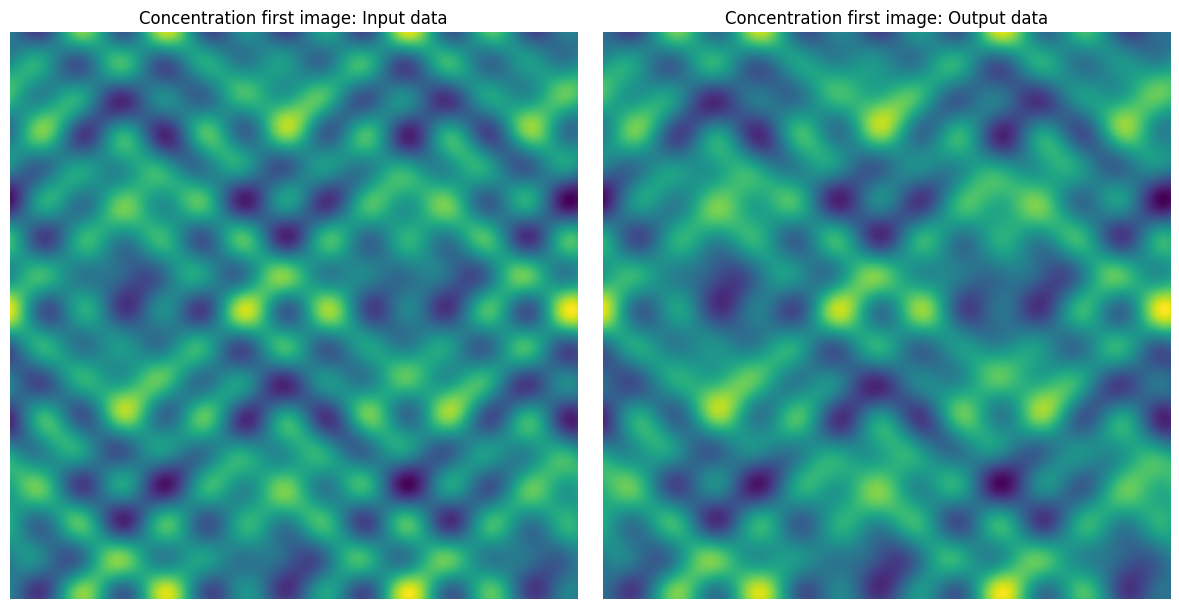

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Concentration first image: Input data")
plt.imshow(conc_in, cmap='viridis', origin="upper")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Concentration first image: Output data")
plt.imshow(conc_out, cmap='viridis', origin="upper")
plt.axis("off")
plt.tight_layout()
plt.show()